# 任务一：路段匹配
这些代码是为了生成库函数需要的road.shp文件和nodes.shp文件，并将结果使用geopandas进行可视化，也可以使用QGIS进行可视化。相关可视化结果及qgis项目存在了product_data/show目录下

In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.wkt import loads
import matplotlib.pyplot as plt

In [21]:
# 读取原始CSV文件
roads_df = pd.read_csv('./data/road.csv')

# 创建一个空的字典来存储唯一的坐标及其对应的节点编号
node_dict = {}
node_index = 0

# 存储节点信息
nodes = []

# 遍历所有坐标
for _, row in roads_df.iterrows():
    start_coords = (row['s_lon'], row['s_lat'])
    end_coords = (row['e_lon'], row['e_lat'])
    
    # 如果起始坐标不在字典中，则添加
    if start_coords not in node_dict:
        node_dict[start_coords] = node_index
        nodes.append((node_index, row['s_lon'], row['s_lat']))
        node_index += 1
        
    # 如果重点坐标不在字典中，则添加
    if end_coords not in node_dict:
        node_dict[end_coords] = node_index
        nodes.append((node_index, row['e_lon'], row['e_lat']))
        node_index += 1

# 创建新的DataFrame并保存为CSV
nodes_df = pd.DataFrame(nodes, columns=['node_id', 'longitude', 'latitude'])
nodes_df.to_csv('./product_data/roadnodes.csv', index=False)

print("节点信息已保存到 nodes.csv")


节点信息已保存到 nodes.csv


In [22]:
# 读取 nodes.csv 文件
nodes_df = pd.read_csv('./product_data/roadnodes.csv')

# 创建几何点对象
geometry = [Point(xy) for xy in zip(nodes_df['longitude'], nodes_df['latitude'])]

# 创建 GeoDataFrame
gdf = gpd.GeoDataFrame(nodes_df, geometry=geometry)

# 设置坐标参考系（CRS）, 要求为世界参考系4326
gdf.set_crs(epsg=4326, inplace=True)

# 保存为 Shapefile
gdf.to_file('./product_data/nodes/nodes.shp', driver='ESRI Shapefile')

print("Shapefile 已保存为 nodes.shp")


Shapefile 已保存为 nodes.shp


   node_id   longitude   latitude                    geometry
0        0  104.100294  30.714795  POINT (104.10029 30.71479)
1        1  104.100096  30.714866   POINT (104.1001 30.71487)
2        2  104.100785  30.716013  POINT (104.10079 30.71601)
3        3  104.101983  30.714223  POINT (104.10198 30.71422)
4        4  104.083862  30.689836  POINT (104.08386 30.68984)


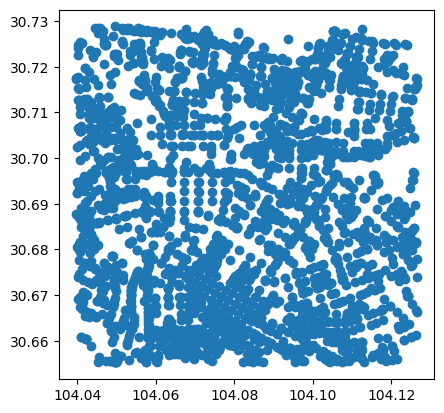

In [23]:
# 读取 Shapefile
gdf = gpd.read_file('./product_data/nodes/nodes.shp')

# 显示前几行数据
print(gdf.head())

# 绘制地图
gdf.plot()
plt.show()


In [24]:
# 读取节点信息
nodes_df = pd.read_csv('./product_data/roadnodes.csv')  # 假设包含 'node_id', 'longitude', 'latitude'

# 创建节点字典以便快速查找
node_dict = {(row['longitude'], row['latitude']): row['node_id'] for _, row in nodes_df.iterrows()}

# 存储 from_node 和 to_node 的映射
edges = []

# 遍历所有道路数据
for _, row in roads_df.iterrows():
    start_coords = (row['s_lon'], row['s_lat'])
    end_coords = (row['e_lon'], row['e_lat'])
    
    # 获取 from_node 和 to_node，若找不到则添加为 NaN
    from_node = node_dict.get(start_coords, None)
    to_node = node_dict.get(end_coords, None)
    edges.append((from_node, to_node))

# 创建新的 DataFrame
edges_df = pd.DataFrame(edges, columns=['from_node', 'to_node'])

# 将 from_node 和 to_node 合并到原始的 roads_df
merged_df = pd.concat([roads_df, edges_df], axis=1)

merged_df.rename(columns={'oneway': 'dir'}, inplace=True)
merged_df.rename(columns={'id': 'link_id'}, inplace=True)
# 保存为新的 CSV 文件
merged_df.to_csv('./product_data/roads.csv', index=False)

print("合并后的数据已保存到 ./product_data/roads.csv")



合并后的数据已保存到 ./product_data/roads.csv


In [25]:

roads_df = pd.read_csv('./product_data/roads.csv')

# roads_df['geometry'] = roads_df.apply(lambda row: LineString([(row['s_lon'], row['s_lat']), (row['e_lon'], row['e_lat'])]), axis=1)
roads_df['geometry'] = roads_df['geometry'].apply(loads)
# 转换为 GeoDataFrame
gdf = gpd.GeoDataFrame(roads_df, geometry='geometry')

gdf.crs = 'EPSG:4326'

# 保存为 Shapefile
gdf.to_file('./product_data/roads/roads.shp', driver='ESRI Shapefile')

print("Shapefile 已保存为 ./product_data/roads/roads.shp")


Shapefile 已保存为 ./product_data/roads/roads.shp


C:\Users\86138\AppData\Local\Temp\ipykernel_17804\237839780.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('./product_data/roads/roads.shp', driver='ESRI Shapefile')
c:\Users\86138\anaconda3\envs\dataMining\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'coordinates' to 'coordinate'
  ogr_write(
c:\Users\86138\anaconda3\envs\dataMining\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value '[[104.0690996, 30.6799019], [104.0684817, 30.6800206], [104.0683177, 30.6800653], [104.0681434, 30.6801454], [104.0680127, 30.6802279], [104.0679086, 30.6803078], [104.0678356, 30.6803724], [104.0677641, 30.6804471], [104.0676947, 30.6805282], [104.0671901, 30.6811507], [104.0670815, 30.681289], [104.0669397, 30.6814313], [104.0668209, 30.681536], [104.0666756, 30.6816584], [104.066587, 30.6817321], [104.066469, 30.6818285], [104.0663196, 30.6819397], [104.0661776, 30.6820445], [104

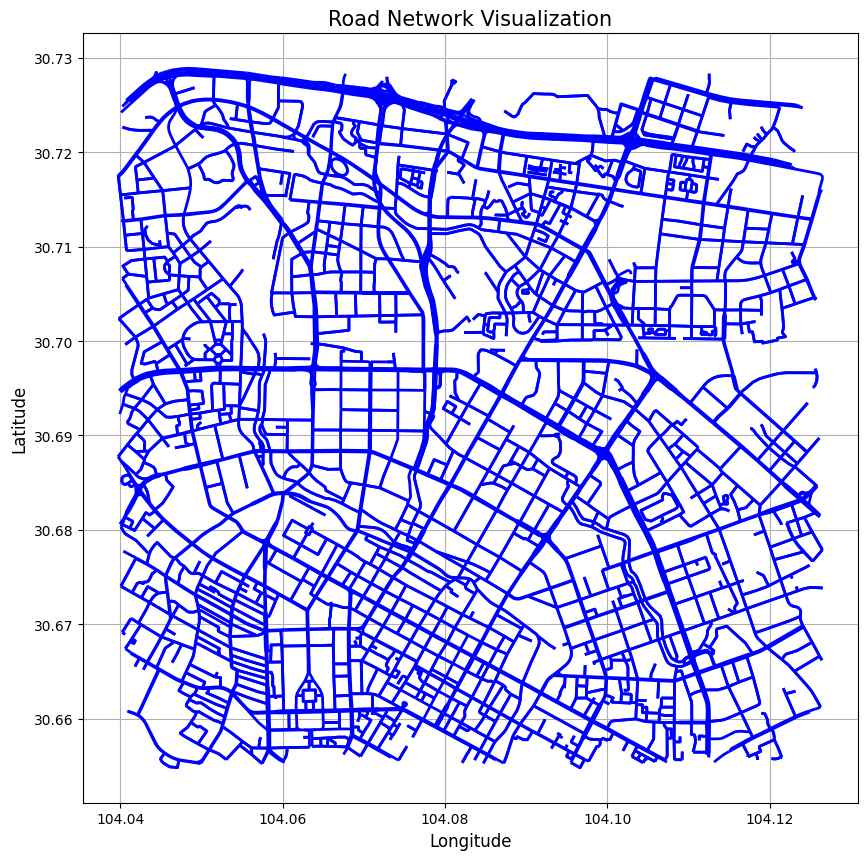

   link_id        type  highway  lanes  tunnel  bridge  roundabout  dir  \
0        0  LineString      5.0      0       0       0           0    0   
1        1  LineString      2.0      0       0       0           0    1   
2        2  LineString      5.0      0       0       0           0    0   
3        3  LineString      4.0      0       0       0           0    0   
4        4  LineString      2.0      3       0       0           0    1   

    length  maxspeed  ...       s_lon      s_lat       e_lon      e_lat  \
0   20.517         0  ...  104.100294  30.714795  104.100096  30.714866   
1  143.316         0  ...  104.100294  30.714795  104.100785  30.716013   
2  173.857         0  ...  104.100294  30.714795  104.101983  30.714223   
3   15.245         0  ...  104.083862  30.689836  104.084002  30.689770   
4  277.305         0  ...  104.083862  30.689836  104.082434  30.687665   

        m_lon      m_lat                                         coordinate  \
0  104.100195  30.7

In [26]:

gdf = gpd.read_file('./product_data/roads/roads.shp')

# 创建一个绘图
fig, ax = plt.subplots(figsize=(10, 10))  # 设置图形大小

# 绘制道路
gdf.plot(ax=ax, color='blue', linewidth=2)

# 设置图形标题和标签
ax.set_title('Road Network Visualization', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 显示网格
ax.grid(True)

# 显示图形
plt.show()
print(gdf.head())

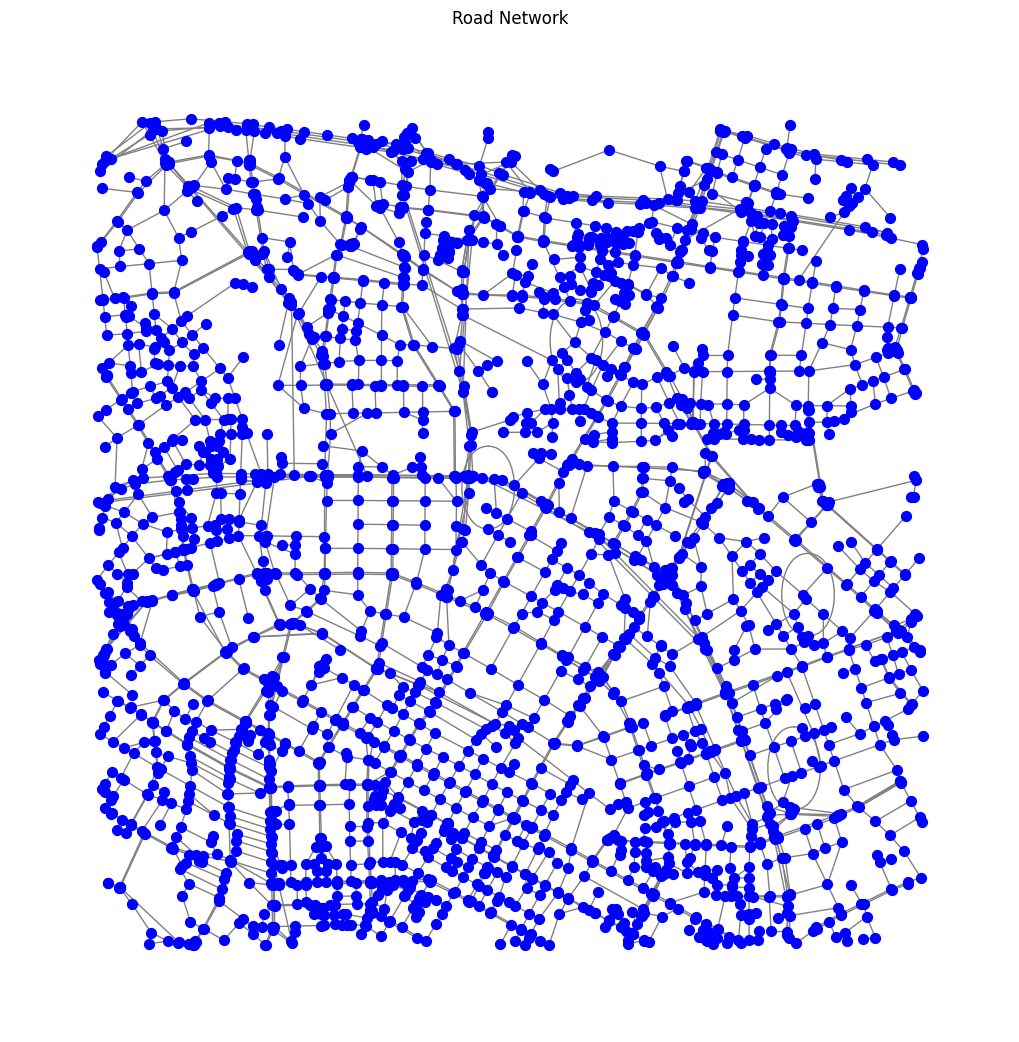

In [27]:
import networkx as nx

# 读取 Shapefile
nodes_gdf = gpd.read_file('./product_data/nodes/nodes.shp')
roads_gdf = gpd.read_file('./product_data/roads/roads.shp')

# 创建一个空的无向图
G = nx.Graph()

# 将节点添加到图中
for _, row in nodes_gdf.iterrows():
    G.add_node(row['node_id'], geometry=row['geometry'])  # 假设 nodes.shp 中有 'node_id' 列

# 将边添加到图中
for _, row in roads_gdf.iterrows():
    # 提取从节点和到节点
    from_node = row['from_node']  # 假设 roads.shp 中有 'from_node' 列
    to_node = row['to_node']      # 假设 roads.shp 中有 'to_node' 列
    G.add_edge(from_node, to_node, geometry=row['geometry'])  # 添加边及其几何信息


# 绘制图形
plt.figure(figsize=(10, 10))
pos = {node: (data['geometry'].x, data['geometry'].y) for node, data in G.nodes(data=True)}
nx.draw(G, pos, with_labels=False, node_size=50, node_color='blue', edge_color='gray', width=1)
plt.title("Road Network")
plt.show()


In [ ]:
import pandas as pd
import transbigdata as tbd
from datetime import datetime


# 读取 traj.csv
traj_df = pd.read_csv('./data/traj.csv')

# 拆分 coordinates 列为 lng 和 lat
traj_df[['lng', 'lat']] = traj_df['coordinates'].str.strip('[]').str.split(',', expand=True)
traj_df[['lng', 'lat']] = traj_df.apply(lambda row: pd.Series(tbd.gcj02towgs84(row['lng'], row['lat'])), axis=1)

traj_df['lon'] = traj_df['coordinates'].apply(lambda coord: ast.literal_eval(coord)[0])
traj_df['lat'] = traj_df['coordinates'].apply(lambda coord: ast.literal_eval(coord)[1])
# 将 lng 和 lat 列转换为浮点数
traj_df['lng'] = traj_df['lng'].astype(float)
traj_df['lat'] = traj_df['lat'].astype(float)
merged_df.rename(columns={'id': 'link_id'}, inplace=True)
traj_df.rename(columns={'trajectory_id': 'agent_id'}, inplace=True)
# 选择需要的列
final_df = traj_df[['lng', 'lat', 'time', 'type', 'agent_id', 'entity_id']]

# 打印转换后的 DataFrame
print(final_df.head())


In [29]:
final_df.to_csv('./product_data/gps_data.csv', index=False, encoding='utf-8')

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from geopy.distance import geodesic

# 读取 traj.csv
traj_df = pd.read_csv('./data/traj.csv')

# 拆分 coordinates 列为 lng 和 lat
traj_df[['lng', 'lat']] = traj_df['coordinates'].str.strip('[]').str.split(',', expand=True)
traj_df[['lng', 'lat']] = traj_df.apply(lambda row: pd.Series(tbd.gcj02towgs84(row['lng'], row['lat'])), axis=1)

# 将 lng 和 lat 列转换为浮点数
traj_df['lng'] = traj_df['lng'].astype(float)
traj_df['lat'] = traj_df['lat'].astype(float)

# 移动平均法平滑经纬度数据
def smooth_coordinates(df, window_size=5):
    """
    对经纬度数据应用移动平均法进行平滑。
    window_size: 滑动窗口大小，通常为奇数。
    """
    df['lng_smooth'] = df['lng'].rolling(window=window_size, min_periods=1).mean()
    df['lat_smooth'] = df['lat'].rolling(window=window_size, min_periods=1).mean()
    return df

# 平滑处理
traj_df = smooth_coordinates(traj_df)

# 异常值检测 - 计算相邻点之间的地理距离，如果超过阈值，认为是异常点
def detect_anomalies(df, max_distance=200):
    """
    检测并去除异常值。
    max_distance: 设置最大距离阈值（单位：米），如果两个相邻点之间的距离超过此值，则认为是异常点。
    """
    anomalies = []
    for i in range(1, len(df)):
        prev_point = (df.loc[i-1, 'lat'], df.loc[i-1, 'lng'])
        curr_point = (df.loc[i, 'lat'], df.loc[i, 'lng'])

        distance = geodesic(prev_point, curr_point).meters
        if distance > max_distance:
            anomalies.append(i)  # 将异常点的索引添加到列表中
        else:
            anomalies.append(None)  # 正常点

    # 标记异常点
    df['anomaly'] = anomalies
    return df

traj_df = detect_anomalies(traj_df)

traj_df['lat'] = traj_df['lat'].where(traj_df['anomaly'].isna(), traj_df['lat'].interpolate())
traj_df['lng'] = traj_df['lng'].where(traj_df['anomaly'].isna(), traj_df['lng'].interpolate())


final_df = traj_df[['lng', 'lat', 'time', 'type', 'agent_id', 'entity_id']]
print(final_df.head())
